In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure

In [2]:
#Taking image
image = cv2.imread('IMG_0863.jpg')

In [3]:
#gray version of image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#equalize the image
dst = cv2.equalizeHist(gray_image)
#do matching
matched =exposure.match_histograms(gray_image, dst,channel_axis=True,)
#taking histograms
histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
histogram_eq = cv2.calcHist([dst], [0], None, [256], [0, 256])
histogram_matched = cv2.calcHist([matched], [0], None, [256], [0, 256])

# applying canny
edges = cv2.Canny(gray_image,100,200)


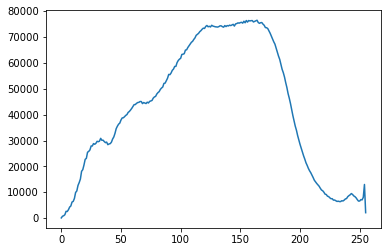

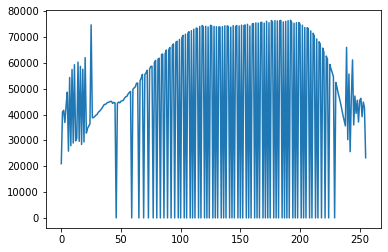

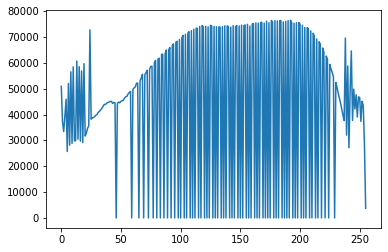

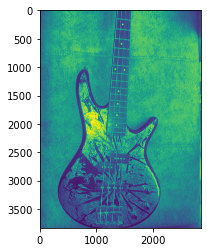

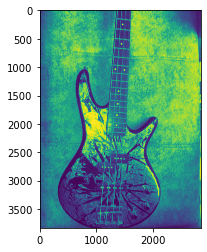

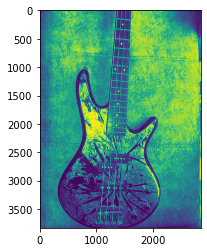

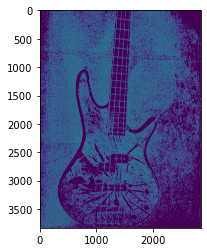

In [4]:
plt.plot(histogram)
plt.show()
plt.plot(histogram_eq)
plt.show()
plt.plot(histogram_matched)
plt.show()

plt.imshow(gray_image)
plt.show()
plt.imshow(dst)
plt.show()
plt.imshow(matched)
plt.show()

plt.imshow(edges)

In [5]:
#this part for RGB histogram (extra resarch) 
#you can ignore this part if you just want last 3 histogram of image
bgr_planes = cv2.split(image)

h_Size = 256
h_Range = (0, 256)

blue_Hist = cv2.calcHist(bgr_planes, [0], None, [h_Size], h_Range, accumulate=False)
green_Hist = cv2.calcHist(bgr_planes, [1], None, [h_Size], h_Range, accumulate=False)
red_Hist = cv2.calcHist(bgr_planes, [2], None, [h_Size], h_Range, accumulate=False)

In [6]:
hist_w = 510
hist_h = 400
bin_w = int(round( hist_w/h_Size ))
histImage = np.zeros((hist_h, hist_w, 3), dtype=np.uint8)

In [7]:
cv2.normalize(blue_Hist, blue_Hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
cv2.normalize(green_Hist, green_Hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
cv2.normalize(red_Hist, red_Hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
#for ignoring output
;

''

In [8]:
for i in range(1, h_Size):
    cv2.line(histImage, ( bin_w*(i-1), hist_h - int(blue_Hist[i-1]) ),
            ( bin_w*(i), hist_h - int(blue_Hist[i]) ),
            ( 255, 0, 0), thickness=2)
    cv2.line(histImage, ( bin_w*(i-1), hist_h - int(green_Hist[i-1]) ),
            ( bin_w*(i), hist_h - int(green_Hist[i]) ),
            ( 0, 255, 0), thickness=2)
    cv2.line(histImage, ( bin_w*(i-1), hist_h - int(red_Hist[i-1]) ),
            ( bin_w*(i), hist_h - int(red_Hist[i]) ),
            ( 0, 0, 255), thickness=2)

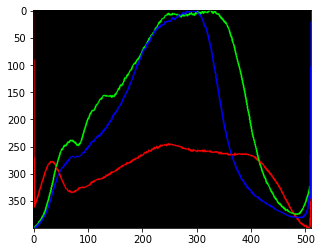

In [9]:
plt.imshow (image)
plt.imshow( histImage)